### Setup Environment

In [1]:
# only took 2 days
import retro
# importing time to slow down game simulation
import time

<!-- conda create --name SFenv python==3.8 -->

In [2]:
# ran via command prompt, run from roms folder to import the downloaded rom
# basically load the rom on retro gym
# !python -m retro.import .

In [3]:
# show available games
retro.data.list_games()

['1942-Nes',
 '1943-Nes',
 '3NinjasKickBack-Genesis',
 '8Eyes-Nes',
 'AaahhRealMonsters-Genesis',
 'AbadoxTheDeadlyInnerWar-Nes',
 'AcceleBrid-Snes',
 'ActRaiser2-Snes',
 'ActionPachio-Snes',
 'AddamsFamily-GameBoy',
 'AddamsFamily-Genesis',
 'AddamsFamily-Nes',
 'AddamsFamily-Sms',
 'AddamsFamily-Snes',
 'AddamsFamilyPugsleysScavengerHunt-Nes',
 'AddamsFamilyPugsleysScavengerHunt-Snes',
 'AdvancedBusterhawkGleylancer-Genesis',
 'Adventure-Atari2600',
 'AdventureIsland-GameBoy',
 'AdventureIsland3-Nes',
 'AdventureIslandII-Nes',
 'AdventuresOfBatmanAndRobin-Genesis',
 'AdventuresOfBayouBilly-Nes',
 'AdventuresOfDinoRiki-Nes',
 'AdventuresOfDrFranken-Snes',
 'AdventuresOfKidKleets-Snes',
 'AdventuresOfMightyMax-Genesis',
 'AdventuresOfMightyMax-Snes',
 'AdventuresOfRockyAndBullwinkleAndFriends-Genesis',
 'AdventuresOfRockyAndBullwinkleAndFriends-Nes',
 'AdventuresOfRockyAndBullwinkleAndFriends-Snes',
 'AdventuresOfStarSaver-GameBoy',
 'AdventuresOfYogiBear-Snes',
 'AeroFighters-Snes',
 

In [4]:
# if below code throws error, run this
# env.close()
# we need to shut down notebook since this is quite clunky

In [5]:
# starts up our game env, only one at a time
env = retro.make(game='StreetFighterIISpecialChampionEdition-Genesis')

In [6]:
# basically we have an image of this dimenson

print(env.observation_space.shape)
env.observation_space.sample()

(200, 256, 3)


array([[[244, 137, 213],
        [120,  95, 210],
        [168, 149, 201],
        ...,
        [180,  45, 114],
        [  7,  27,  66],
        [ 32, 247,  14]],

       [[206, 247, 140],
        [ 63, 166,  63],
        [173, 149, 248],
        ...,
        [228,   9, 240],
        [ 43, 199, 116],
        [ 80,  28, 179]],

       [[ 58, 140,   5],
        [ 60, 101,  46],
        [ 37, 231, 158],
        ...,
        [205,  48,  96],
        [150, 165,  29],
        [157, 158, 133]],

       ...,

       [[174, 176, 112],
        [ 65, 118, 142],
        [191,  37, 205],
        ...,
        [228,  56,   0],
        [253,  10, 191],
        [ 64, 139,  75]],

       [[ 26, 131,  88],
        [209, 216, 254],
        [ 35, 129, 180],
        ...,
        [ 95, 242, 216],
        [189,  19, 178],
        [229, 189, 165]],

       [[ 57,  31, 159],
        [ 20,  96,  59],
        [ 85, 190, 159],
        ...,
        [  6, 189, 170],
        [ 99,  14, 195],
        [172,  82, 167]]

In [7]:
# this means that the set of actions (12) available, can be 1/0, ie multi binary
print(env.action_space)
print(env.action_space.sample())

MultiBinary(12)
[1 0 1 0 1 1 1 0 0 1 0 1]


In [8]:
# # Reset game to start state each time
# obs = env.reset()
# done = False

# for game in range(1):
#     while not done:
#         if done:
#             obs = env.reset()
#         # render environment
#         # def need <pip install pyglet==1.3.2>, this particular version to run this
#         env.render()
#         # pick a move PURELY based on random actions
#         obs, reward, done, info = env.step(env.action_space.sample())
#         time.sleep(0.005)
#         print(reward)

In [28]:
# Set the timer limit (60 seconds)
timer_limit = 60
start_time = time.time()

obs = env.reset()
# to check if we have died
done = False

while not done:
    if done:
        obs = env.reset()
        env.close()
    # Render environment
    env.render()
    # Pick a move PURELY based on random actions
    obs, reward, done, info = env.step(env.action_space.sample())
    time.sleep(0.001)
    if (reward > 0):
        print(reward)
    
    # Check if the time limit is reached
    if time.time() - start_time > timer_limit:
        done = True

yes


TypeError: render() takes 1 positional argument but 2 were given

##### we can see that the rewards suck

In [ ]:
# if you dont want to deal with not responding, okay that didnt work
env.close()

In [11]:
info

{'enemy_matches_won': 0,
 'score': 3000,
 'matches_won': 0,
 'continuetimer': 0,
 'enemy_health': 7,
 'health': 29}

### Preprocessing

In [ ]:
# Observations Preprocessing
# What we gonna do - calculate change in pixels between current and last frame
#                  - drop pixels to make game faster (200x256x3) -> (84x84x1)
#                  - filter actions using gym retro
#                  - set reward to score (modifiable)

In [12]:
# env base class for a wrapper
from gym import Env
# space shapes for the env
from gym.spaces import MultiBinary, Box
import numpy as np
# used for grayscaling
import cv2
# to plot images
import matplotlib.pyplot as plt

##### Debugging / More intuition

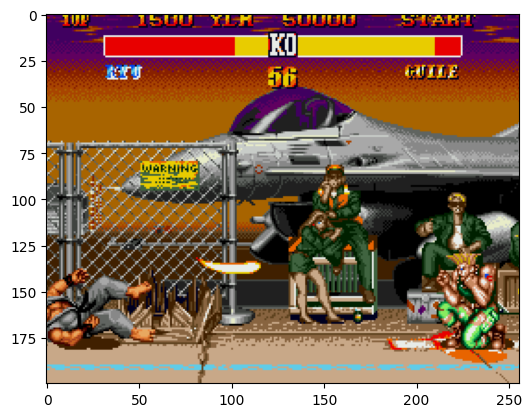

In [ ]:
plt.imshow(obs)

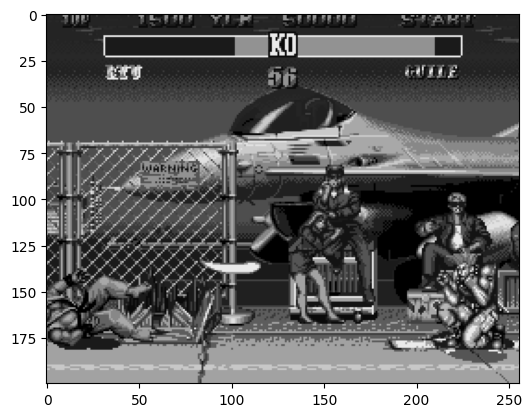

In [ ]:
# lets try to convert this to gray scale
graytest = cv2.cvtColor(obs, cv2.COLOR_BGR2GRAY)
# not needed in preprocessing, just for us to view
plt.imshow(cv2.cvtColor(graytest, cv2.COLOR_BGR2RGB))

In [ ]:
obs.shape

(200, 256, 3)

(84, 84)


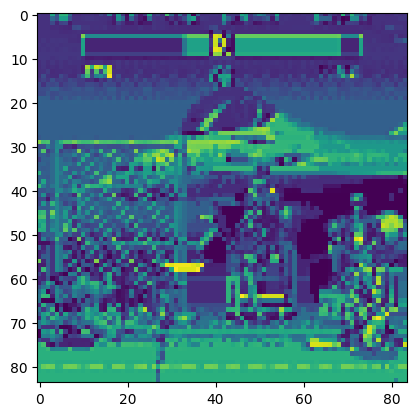

In [ ]:
resize_obs = cv2.resize(graytest, (84,84), interpolation=cv2.INTER_CUBIC)
print(resize_obs.shape)
plt.imshow(resize_obs)

In [ ]:
channels_test = np.reshape(resize_obs, (84, 84, 1))
print(channels_test.shape)

(84, 84, 1)


In [ ]:
# box helps us return any type of array, with our preferred datatype (uint8)
Box(low=0, high=255, shape=(200, 256, 3), dtype='uint8')

Box([[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
 

### Preprocess the Main Environment

In [13]:
class StreetFighter(Env):
    def __init__(self):
        super().__init__()
        # we need to define our action space and observation space
        self.observation_space = Box(low=0, high=255, shape=(84, 84, 1), dtype='uint8')
        self.action_space = MultiBinary(12)
        # start an instance of the game
        self.game = retro.make(game='StreetFighterIISpecialChampionEdition-Genesis',use_restricted_actions = retro.Actions.FILTERED)
    
    # what we do in evn
    def preprocess(self, observation):
        # grayscale and then resize
        gray = cv2.cvtColor(observation, cv2.COLOR_BGR2GRAY)
        # interpolation -> used to fill the color of the new pixels
        # cubis -> uses a cubic polynoimial to decide the value using adjacent pixels
        resize = cv2.resize(gray, (84,84), interpolation=cv2.INTER_CUBIC)
        # but we need (84x84x1)
        channels = np.reshape(resize, (84, 84, 1))
        return channels

    def step(self, action):
        obs, reward, done, info = self.game.step(action)
        obs = self.preprocess(obs)

        frame_delta = obs - self.previous_frame
        self.previous_frame = obs

        # reshape reward function
        reward_new = info['score'] - self.score
        self.score = info['score']

        return frame_delta, reward_new, done, info

    def reset(self):
        # return first frame
        obs = self.game.reset()

        # preprocessing
        obs = self.preprocess(obs)

        # for ccalculating frame delta
        self.previous_frame = obs
        # change in score, score delta
        self.score = 0
        return obs
    
    def render(self):
        return self.game.render()
    
    def close(self):
        return self.game.close()

##### Again debugging

In [ ]:
env.close()

In [ ]:
env = StreetFighter()

In [ ]:
print(env.observation_space.shape)
print(env.observation_space.sample())

(84, 84, 1)
[[[178]
  [173]
  [ 58]
  ...
  [200]
  [ 18]
  [217]]

 [[  9]
  [162]
  [233]
  ...
  [ 77]
  [ 47]
  [ 14]]

 [[ 44]
  [116]
  [195]
  ...
  [ 29]
  [107]
  [100]]

 ...

 [[103]
  [204]
  [107]
  ...
  [ 47]
  [ 84]
  [195]]

 [[ 84]
  [247]
  [168]
  ...
  [240]
  [223]
  [ 78]]

 [[187]
  [168]
  [227]
  ...
  [169]
  [ 46]
  [ 29]]]


In [ ]:
print(env.action_space.shape)
print(env.action_space.sample())

(12,)
[1 1 0 0 1 0 1 0 1 1 1 1]


In [ ]:
obs = env.reset()

done = False
for game in range(1):
    while not done:
        if done:
            obs = env.reset()
        env.render()
        obs, reward, done, info = env.step(env.action_space.sample())
        time.sleep(0.005)
        if (reward > 0):
            print(reward)

100
1000
100
500
500
1000
1500
100
100
100
100
100
100
100
100
100
1000
1000
1000
1000
1000
1000
1000
1000
10000
500
500
1000
400


KeyboardInterrupt: 

In [ ]:
obs = env.reset()

In [ ]:
obs, reward, done, info = env.step(env.action_space.sample())

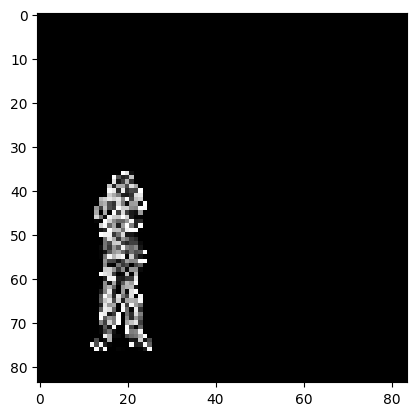

In [ ]:
# this is because of the frame delta
plt.imshow(cv2.cvtColor(obs, cv2.COLOR_BGR2RGB))

### Hyperparameter Tuning

In [ ]:
# make sure to import pytorch, stable-baseline3 and optuna

In [14]:
# importing the optimization framework
import optuna 
import os

# PPO algo for RL
from stable_baselines3 import PPO
# import the eval policy method for metric calculation
from stable_baselines3.common.evaluation import evaluate_policy
# get the sb3 monitor for logging
from stable_baselines3.common.monitor import Monitor
# import vec wrappers to vectorize and frame stack
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack

In [22]:
LOG_DIR = './logs/'
OPT_DIR = './opt/'

In [16]:
# function tp choose and return best hyperparameters
def optimize_PPO(trial):
    return {
        'n_steps' : trial.suggest_int('n_steps', 1024, 2048),
        'gamma' : trial.suggest_loguniform('gamma', 0.9, 0.9999),
        'learning_rate':trial.suggest_loguniform('learning_rate', 1e-5, 1e-4),
        'clip_range' : trial.suggest_uniform('clip_range', 0.1, 0.2),
        'gae_lambda' : trial.suggest_uniform('gae_lambda', 0.95, 0.99)
    }

#### yet more debugging

In [25]:
env.close()

In [26]:
def optimize_agent(trial):
    model_params = optimize_PPO(trial)

    # create env
    env = StreetFighter()
    # print("bruh")
    # allows us to log mean ep reward and mean ep length
    env = Monitor(env, LOG_DIR)
    env = DummyVecEnv([lambda: env])
    # print("bruh0")
    env = VecFrameStack(env, 4, channels_order='last')

    # print("bruh1")
    # create algo
    # **model_params -> unpacks the model params from optuna and passing them to the model
    model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=0, **model_params)
    # print("bruh2")
    
    # model.learn(total_timesteps=100000)
    model.learn(total_timesteps=100)

    # evaluate model
    # mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5)
    mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=1)
    env.close()

    # save the models
    SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(trial.number))
    model.save(SAVE_PATH)

    return mean_reward


In [17]:
def optimize_agent(trial):
    try:
        model_params = optimize_PPO(trial)

        # create env
        env = StreetFighter()
        # print("bruh")
        # allows us to log mean ep reward and mean ep length
        env = Monitor(env, LOG_DIR)
        env = DummyVecEnv([lambda: env])
        # print("bruh0")
        env = VecFrameStack(env, 4, channels_order='last')

        # print("bruh1")
        # create algo
        # **model_params -> unpacks the model params from optuna and passing them to the model
        model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=0, **model_params)
        # print("bruh2")
        
        # model.learn(total_timesteps=100000)
        model.learn(total_timesteps=100)

        # evaluate model
        # mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5)
        mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=1)
        env.close()

        # save the models
        SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(trial.number))
        model.save(SAVE_PATH)

        return mean_reward
    
    except Exception as e:
        return -10000


In [27]:
study = optuna.create_study(direction='maximize')
# study.optimize(optimize_agent, n_trials=10, n_jobs=1)
study.optimize(optimize_agent, n_trials=2, n_jobs=1)

[I 2024-03-11 23:57:30,929] A new study created in memory with name: no-name-016e75df-2319-49c6-8ee3-d923317de3d4
c:\Users\ojasa\.conda\envs\StreetFightEnv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  """
c:\Users\ojasa\.conda\envs\StreetFightEnv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  
c:\Users\ojasa\.conda\envs\StreetFightEnv\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  import sys
c:\Users\oja

In [28]:
study.best_params

{'n_steps': 1639,
 'gamma': 0.9648918962895977,
 'learning_rate': 1.554242830797227e-05,
 'clip_range': 0.12604499769387906,
 'gae_lambda': 0.9821821408031359}

In [29]:
PPO.load(os.path.join(OPT_DIR, 'trial_1_best_model.zip'))

### setup callback

In [30]:
from stable_baselines3.common.callbacks import BaseCallback

In [31]:
class TrainandLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainandLoggingCallback ,self).__init__()
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)
        
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

In [32]:
CHECKPOINT_DIR = './train'

In [33]:
callback = TrainandLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

### Training the Model

In [24]:
env.close()

In [25]:
# Create new environment 
env = StreetFighter()
env = Monitor(env, LOG_DIR)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

In [88]:
model_params = study.best_params
model_params['n_steps'] = 7488  # set n_steps to 7488 or a factor of 64

# model_params['learning_rate'] = 5e-7
model_params

{'n_steps': 7488,
 'gamma': 0.9648918962895977,
 'learning_rate': 1.554242830797227e-05,
 'clip_range': 0.12604499769387906,
 'gae_lambda': 0.9821821408031359}

In [52]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, **model_params)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [53]:
model.load(os.path.join(OPT_DIR, 'trial_1_best_model.zip'))

In [54]:
model.learn(total_timesteps=100, callback=callback)

Logging to ./logs/PPO_12
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 5.57e+03 |
|    ep_rew_mean     | 4.3e+03  |
| time/              |          |
|    fps             | 307      |
|    iterations      | 1        |
|    time_elapsed    | 24       |
|    total_timesteps | 7488     |
---------------------------------


### Evaluate the model

In [26]:
model = PPO.load("./opt/trial_1_best_model.zip")

In [13]:
# env.close()

In [27]:
mean_reward, _ = evaluate_policy(model, env, render=True, n_eval_episodes=2)
mean_reward

yes


TypeError: render() takes 1 positional argument but 2 were given

### Test out the model

In [26]:
obs = env.reset()

In [27]:
obs.shape

(200, 256, 3)

In [28]:
env.step(model.predict(obs)[0])

ValueError: Error: Unexpected observation shape (200, 256, 3) for Box environment, please use (4, 84, 84) or (n_env, 4, 84, 84) for the observation shape.

In [29]:
env.render()

KeyboardInterrupt: 

In [30]:
# Reset game to starting state
obs = env.reset()
# Set flag to flase
done = False
for game in range(1): 
    while not done: 
        if done: 
            obs = env.reset()
        env.render()
        action = model.predict(obs)[0]
        obs, reward, done, info = env.step(action)
        time.sleep(0.01)
        print(reward)

KeyboardInterrupt: 